In [ ]:
#importing all the libraries required
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##Loading the dataset

In [ ]:
#read the dataset using pandas
data = pd.read_csv('salary_dataAIEVENTD1.csv')


In [ ]:
#first five data in dataset
data.head()

,YearsExperience,Salary
0,1.1,40000
1,1.3,45000
2,1.5,47000
3,2.0,50000
4,2.2,52000


In [ ]:
#last five data in dataset
data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112000
28,10.3,122391
29,10.5,122000


In [ ]:
#provides some information regarding the columns in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


##Basic Statistics about Data

In [ ]:
#this describes the basic stat about the dataset used
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,77050.633333
std,2.837888,26135.787599
min,1.100000,40000.000000
25%,3.200000,57108.000000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


##Plotting the points

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x432 with 0 Axes>

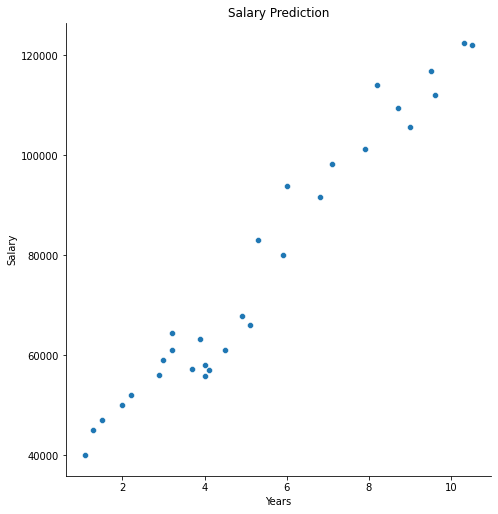

In [ ]:
#these plots help to explain the values and how they are scattered

plt.figure(figsize=(12,6))
sns.pairplot(data,x_vars=['YearsExperience'],y_vars=['Salary'],size=7,kind='scatter')
plt.xlabel('Years')
plt.ylabel('Salary')
plt.title('Salary Prediction')
plt.show()

##Model Fitting- Simple Linear Regression

In [ ]:
X = data[['YearsExperience']]
y = data[['Salary']]

##Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
import statsmodels.api as sm
X_addC = sm.add_constant(X_train)
model = sm.OLS(y_train, X_addC).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     555.3
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           4.21e-17
Time:                        14:07:37   Log-Likelihood:                -239.03
No. Observations:                  24   AIC:                             482.1
Df Residuals:                      22   BIC:                             484.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.924e+04   2247.150     13.013      0.000    2.46e+04    3.39e+04
YearsExperience  8924.0381    378.697     23.565      0.000    8138.670    9709.407
==============================================================================
Omnibus:                        0.757   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.685   Jarque-Bera (JB):                0.660
Skew:                          -0.366   Prob(JB):                        0.719
Kurtosis:                       2.650   Cond. No.                         12.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print(model.rsquared, model.rsquared_adj)

0.9618926205492144 0.9601604669378151


##Plotting the Line

[8924.03805974] [29242.34423175]


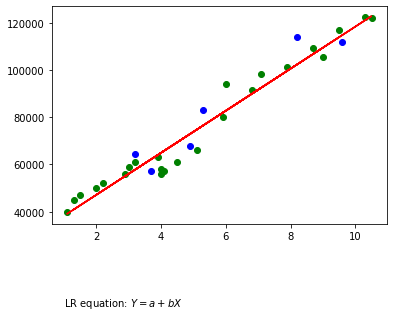

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt


X = np.array(X_train).reshape((-1,1))
model = LinearRegression().fit(X_train, y_train)

fig = plt.figure()
ax = fig.add_subplot()

plt.scatter(X_train, y_train, color='g')
plt.scatter(X_test, y_test, color='b')

plt.plot(X_train, model.predict(X_train), color='r')
ax.text(1, 4, r'LR equation: $Y = a + bX$', fontsize=10)

print(model.coef_[0], model.intercept_)


##Making the Prediction

In [ ]:
#predicting the salary for the test values

X_test_c = sm.add_constant(X_test)

y_pred = model.predict(X_test_c)

ValueError: ignored

In [ ]:
X_test['Prediction'] = y_pred
X_test['y_test'] = y_test

NameError: ignored

In [ ]:
X_test

,YearsExperience
27,9.6
15,4.9
23,8.2
17,5.3
8,3.2
9,3.7
